In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm, gamma, expon, entropy
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from scipy.stats import norm, gamma, expon, rayleigh, invgamma, entropy,laplace

KL SCORES FUNCTION

In [ ]:
def fit_distributions(data):
    if isinstance(data, pd.Series):
          data = data.values

    x = np.linspace(min(data), max(data), 1000)

    # Compute empirical histogram as PDF
    data_histogram, bins = np.histogram(data, bins=1000, density=True)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Bin centers

    # Gaussian
    gaussian_params = norm.fit(data)
    gaussian_pdf = norm.pdf(bin_centers, *gaussian_params)

    # Gamma
    gamma_params = gamma.fit(data)
    gamma_pdf = gamma.pdf(bin_centers, *gamma_params)

    # Exponential
    exponential_params = expon.fit(data)
    exponential_pdf = expon.pdf(bin_centers, *exponential_params)
    # Rayleigh
    rayleigh_params = rayleigh.fit(data)
    rayleigh_pdf = rayleigh.pdf(bin_centers, *rayleigh_params)

    # Inverse Gamma
    invgamma_params = invgamma.fit(data)
    invgamma_pdf = invgamma.pdf(bin_centers, *invgamma_params)


    # Calculate KL Divergence - ensure the comparison uses same bins
    kl_scores = {
        'Gaussian': entropy(data_histogram, gaussian_pdf),
        'Gamma': entropy(data_histogram, gamma_pdf),
        'Exponential': entropy(data_histogram, exponential_pdf),
        'Rayleigh': entropy(data_histogram, rayleigh_pdf),
        'Inverse Gamma': entropy(data_histogram, invgamma_pdf)
    }
    return kl_scores

In [ ]:
data = pd.read_csv('/content/ANAD.csv')
dat=data['pcm_intensity_sma_kurtosis']
data=data['pcm_intensity_sma_skewness']


KL scores for Skewness

In [ ]:
kl_scores = fit_distributions(data)

# Determine the best model
best_fit = min(kl_scores, key=kl_scores.get)

print("KL Divergence Scores:", kl_scores)
print("Best fitting distribution:", best_fit)

KL Divergence Scores: {'Gaussian': 0.6268260822917792, 'Gamma': 0.6359936943768922, 'Exponential': 1.5931428257456237, 'Rayleigh': 1.09370413939213, 'Inverse Gamma': 0.6452787226953992}
Best fitting distribution: Gaussian


KL Scores for Kurtosis

In [ ]:
kl_scores1 = fit_distributions(dat)

# Determine the best model
best_fit1 = min(kl_scores1, key=kl_scores1.get)

print("KL Divergence Scores:", kl_scores1)
print("Best fitting distribution:", best_fit1)

KL Divergence Scores: {'Gaussian': 0.6939315227301015, 'Gamma': 0.5289165576637261, 'Exponential': 1.006058820723324, 'Rayleigh': 0.6399014221303877, 'Inverse Gamma': 0.48517800657063037}
Best fitting distribution: Inverse Gamma


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:8280: RuntimeWarning: overflow encountered in divide
  s3 = (1/xm).sum()


In [ ]:
from sklearn.utils import resample

MLE VS MOM FOR SKEWNESS

In [ ]:

n_bootstrap = 1000
# Storage for estimates
estimates_mom = []
estimates_mle = []
for _ in range(n_bootstrap):
    # Resample the data
    sample = resample(data)

    #mom
    sample_mean = np.mean(sample)
    sample_var = np.var(sample)
    estimates_mom.append((sample_mean, sample_var))

    # Maximum Likelihood Estimation (MLE)
    # Fit using scipy's invgamma fitting, fixing location to zero
    mue,vari = norm.fit(data)
    estimates_mle.append((mue,vari))

In [ ]:
estimates_mom = np.array(estimates_mom)
estimates_mle = np.array(estimates_mle)

BOX PLOTS FOR SKEWNESS


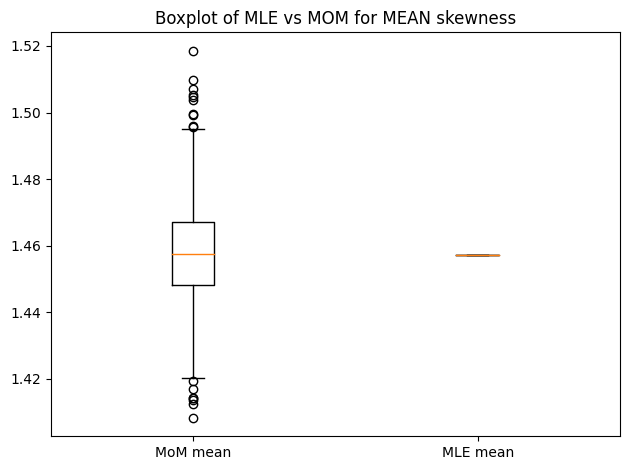

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.boxplot([estimates_mom[:, 0], estimates_mle[:, 0]], labels=['MoM mean', 'MLE mean'])
plt.title('Boxplot of MLE vs MOM for MEAN skewness')


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot of MLE vs MOM for VARIANCE skewness')

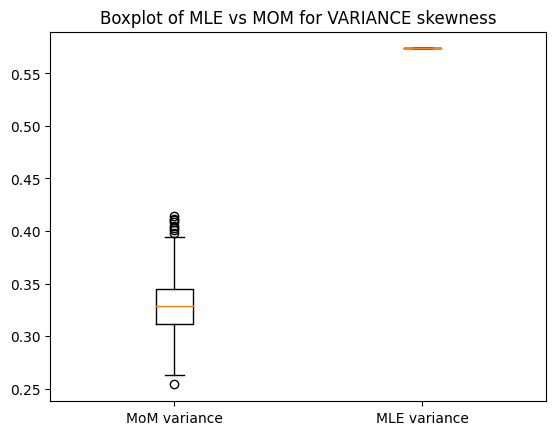

In [ ]:
plt.boxplot([estimates_mom[:, 1], estimates_mle[:, 1]], labels=['MoM variance', 'MLE variance'])
plt.title('Boxplot of MLE vs MOM for VARIANCE skewness')

MLE ESTIMATION for skewness

In [ ]:
mu, sigma = norm.fit(data)

print("Estimated parameters for the Gaussian distribution:")
print("Mean (mu):", mu)
print("Standard Deviation (sigma):", sigma)

Estimated parameters for the Gaussian distribution:
Mean (mu): 1.457213618944324
Standard Deviation (sigma): 0.573737136170554


MLE VS MOM FOR KURTOSIS


In [ ]:
estimates_mom1 = []
estimates_mle1 = []
n_bootstrap = 1000
for _ in range(n_bootstrap):
    # Resample the data
    sample1 = resample(dat)

    # Method of Moments (MoM)
    # Calculate the sample mean and variance
    sample_mean1 = np.mean(sample1)
    sample_var1 = np.var(sample1)


    alpha_mom = 2 + (sample_mean ** 2 / sample_var)
    beta_mom = sample_mean * (alpha_mom - 1)
    estimates_mom1.append((alpha_mom, beta_mom))

    # Maximum Likelihood Estimation (MLE)
    # Fit using scipy's invgamma fitting, fixing location to zero
    params = invgamma.fit(sample, floc=0)
    estimates_mle1.append((params[0], params[2]))

In [ ]:
estimates_mom1 = np.array(estimates_mom1)
estimates_mle1 = np.array(estimates_mle1)


BOX  for kurtosis

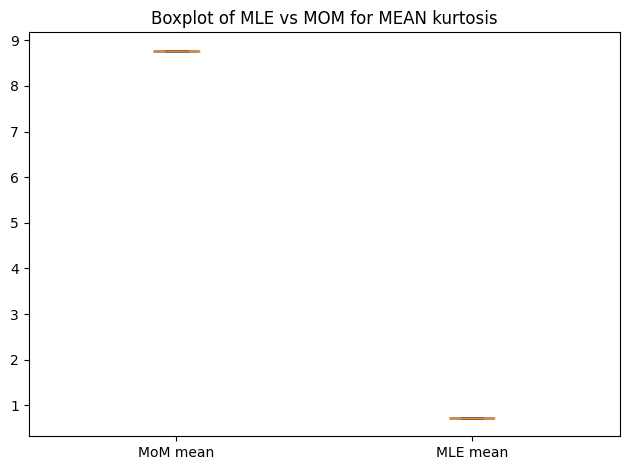

In [51]:
plt.boxplot([estimates_mom1[:, 0], estimates_mle1[:, 0]], labels=['MoM mean', 'MLE mean'])
plt.title('Boxplot of MLE vs MOM for MEAN kurtosis')


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot of MLE vs MOM for VARIANCE kurtosis')

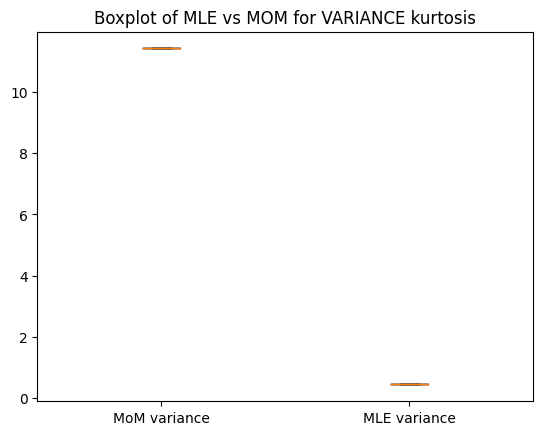

In [53]:
plt.boxplot([estimates_mom1[:, 1], estimates_mle1[:, 1]], labels=['MoM variance', 'MLE variance'])
plt.title('Boxplot of MLE vs MOM for VARIANCE kurtosis')

HISTOGRAM PLOTS

Text(0.5, 1.0, ' alpha MLE of kurtosis')

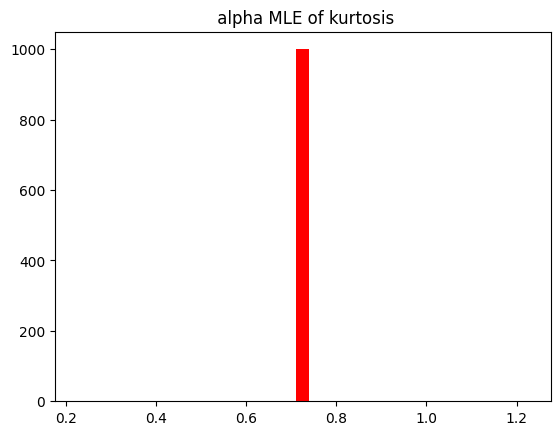

In [ ]:
plt.hist(estimates_mle1[:, 0], bins=35,color='red')
plt.title(' alpha MLE of kurtosis')

Text(0.5, 1.0, ' alpha MOM of kurtosis')

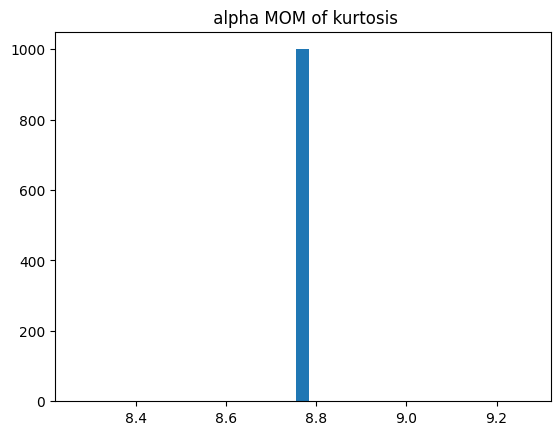

In [ ]:
plt.hist(estimates_mom1[:, 0], bins=35,)
plt.title(' alpha MOM of kurtosis')

Text(0.5, 1.0, ' beta MLE of kurtosis')

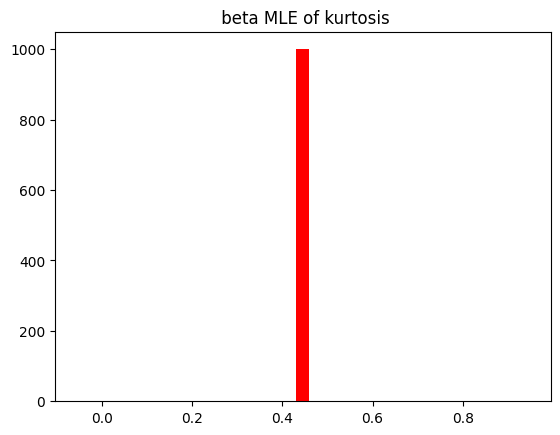

In [ ]:
plt.hist(estimates_mle1[:, 1], bins=35,color='red')
plt.title(' beta MLE of kurtosis')

Text(0.5, 1.0, ' beta MOM of kurtosis')

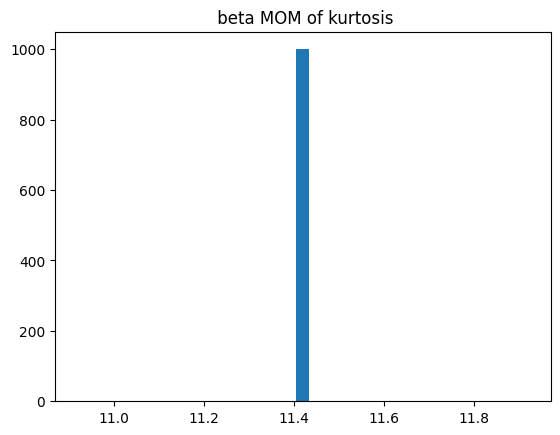

In [ ]:
plt.hist(estimates_mom1[:, 1], bins=35)
plt.title(' beta MOM of kurtosis')

QQ - PLOTS

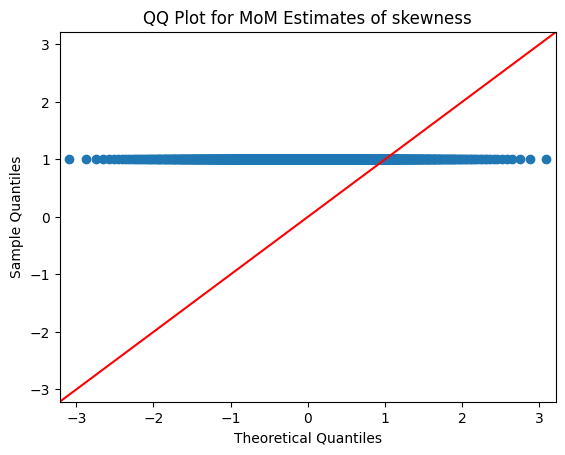

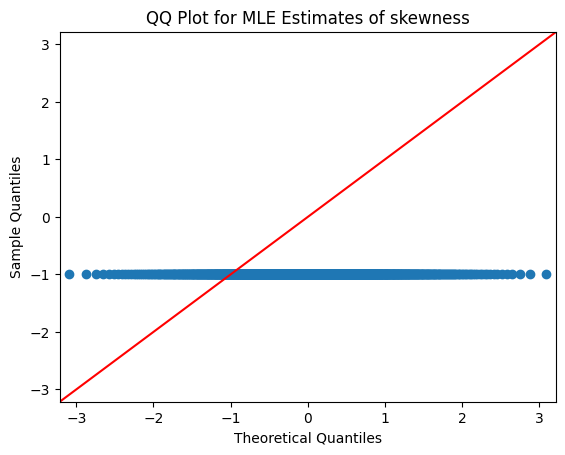

In [ ]:
import statsmodels.api as sm
data_mom = estimates_mom1[:, 0]  # Example: Alpha parameter from MoM
data_mle = estimates_mle1[:, 0]  # Example: Alpha parameter from MLE

# QQ plot for Method of Moments
sm.qqplot(data_mom, line ='45', fit=True)
plt.title('QQ Plot for MoM Estimates of skewness')
plt.show()

# QQ plot for Maximum Likelihood Estimation
sm.qqplot(data_mle, line ='45', fit=True)
plt.title('QQ Plot for MLE Estimates of skewness')
plt.show()

MLE ESTIMATION for kurtosis

In [ ]:
alpha, loc, beta = invgamma.fit(dat)

print("Estimated parameters for the Inverse Gamma distribution:")
print("Shape (alpha):", alpha)
print("Scale (beta):", beta)

Estimated parameters for the Inverse Gamma distribution:
Shape (alpha): 17.751997744969767
Scale (beta): 133.84199239395377


MOM ESTIMATION for kurtosis

In [ ]:
m1=np.mean(dat)
v1=np.var(dat)
alpha1 = 2 + (m1**2 / v1)
beta1 = m1* (1 + (m1**2 / v1))

print("Estimated Alpha (α):", alpha1)
print("Estimated Beta (β):", beta1)

Estimated Alpha (α): 6.211853437286968
Estimated Beta (β): 24.983637156132993


CORRELATION


In [ ]:
d = np.stack((data,dat), axis=0) #for skewness and kurtosis


cov_matrix = np.cov(d)
print(cov_matrix)
cov_xy = cov_matrix[0, 1]
var_x = cov_matrix[0, 0]
var_y = cov_matrix[1, 1]


correlation = cov_xy / (np.sqrt(var_x) * np.sqrt(var_y))
print(correlation)

[[0.00984101 0.00890377]
 [0.00890377 0.01034497]]
0.8824491796435042


LAPLACIAN NOISE

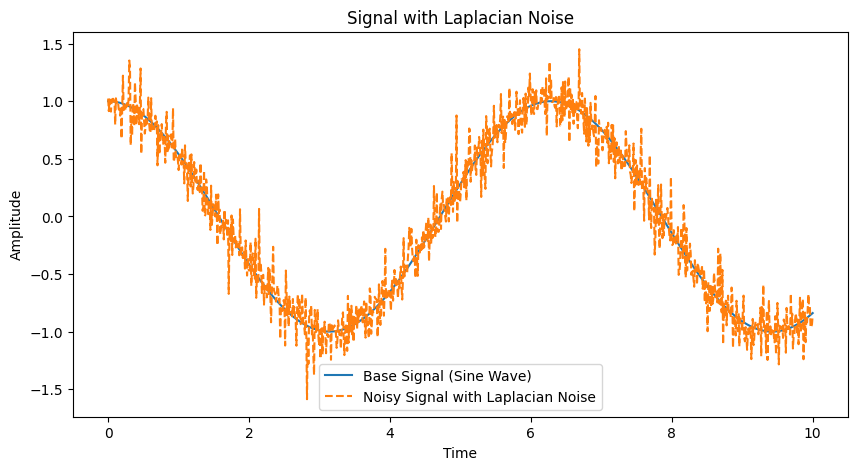

In [48]:
n_points = 1000
time = np.linspace(0, 10, n_points)
base_signal = np.cos(time)  # Example base signal


location = 0
scale = 0.1
noise = np.random.laplace(location, scale, n_points)
noisy_signal = base_signal + noise

plt.figure(figsize=(10, 5))
plt.plot(time, base_signal, label='Base Signal (Sine Wave)')
plt.plot(time, noisy_signal, label='Noisy Signal with Laplacian Noise', linestyle='--')
plt.title('Signal with Laplacian Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
from scipy.optimize import minimize

In [ ]:
observed_data = noisy_signal

# Method of Moments (MOM) Estimation
mom_mean = np.mean(observed_data)
mom_scale = np.mean(np.abs(observed_data - mom_mean))

# Maximum Likelihood Estimation (MLE)
params_lap = laplace.fit(observed_data, floc=mom_mean)

print("Method of Moments (MOM) Estimates:")
print("Mean (Location):", mom_mean)
print("Scale (Diversity):", mom_scale)
print("\nMaximum Likelihood Estimation (MLE) Estimates:")
print("Mean (Location):", params_lap[0])
print("Scale (Diversity):", params_lap[1])

Method of Moments (MOM) Estimates:
Mean (Location): -0.05669247220329305
Scale (Diversity): 0.6639546109261478

Maximum Likelihood Estimation (MLE) Estimates:
Mean (Location): -0.05669247220329305
Scale (Diversity): 0.6639546109261478
